# Tutorial 2

Submission via Uni2Work

Deadline: 21.11.2022, 4:00pm 

Questions: iui@medien.ifi.lmu.de

Please upload for your solution this notebook with the answers to the following tasks as well as your original code via Uni2Work.

## Quick Recap

Last tutorial we showed during the lecture how to do basic data analytics with Python using a German Credit Score data set. During the follow up assingment that was handed in, you have worked wtih a subset of the Titanic data set, where you were tasked with the creation of decision trees in Python using the sklearn package. 

During the second lecture we talked about creating a spam filter, we came up with a lot of different features that could be of importances while creating a spam filter, like the domain the email was send from, the number of people who received this email, and many more. We did not talk about the content of the email during the lecture, but during this tutorial we will have a look of what kind of features we could get from the context of the email. 

During this tutorial we'll look at some data from spam emails. As mentioned during the lecture, might not wat to look at the text and analyse this. As such we will work with an already analysed data set namely "SPAM E-mail Database" from UCI Machine Learning [Repository](https://archive.ics.uci.edu/ml/datasets/Spambase). This so called "Spambase" dataset contains real data examples. So the author analysed real emails.

The dataset contains 57 features. These consist of:

* 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail.  A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. So the first 48 attributes show the frequency of single words in the email. 

* 6 continuous real [0,100] attributes of type char_freq_CHAR = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

* 1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

* 1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

* 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

Please download the dataset and have a look at the different features, look at the documentation attached. This will tell you a lot that can help you with designing your own decision tree. For this tutorial we will not focus on how the authors of the dataset found these features or how the text analysis was performed.

Lets start with loading in the data using a pandas csv reader and merge those two data frames together such that the column names are in the correct place. Let's also check that the dataframe actually looks nice.

In [1]:
import pandas as pd

names = pd.read_csv('names.csv', header=None, sep=';').T.values[0]
df = pd.read_csv('spambase.data', names=names)

df

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00                0.00   
1              0.14            0.28              0.21                0.07   
2              1.23            0.19              0.19                0.12   
3              0.63            0.00              0.31                0.63   
4              0.63            0.00              0.31                0.63   
...             ...             ...               ...                 ...   
4596           0.00            0.31              0.00                0.00   
4597           0.00            0.00              0.00                0.00   
4598           0.00            0.00              0.00                0.00   
4599           0.32            0.00              0.00                0.00   
4600           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0                0.00            0.00  ...        0.000        0.000   
1                0.00            0.94  ...        0.000        0.132   
2                0.64            0.25  ...        0.010        0.143   
3                0.31            0.63  ...        0.000        0.137   
4                0.31            0.63  ...        0.000        0.135   
...               ...             ...  ...          ...          ...   
4596             0.00            0.00  ...        0.000        0.232   
4597             0.00            0.00  ...        0.000        0.000   
4598             0.00            0.00  ...        0.102        0.718   
4599             0.00            0.00  ...        0.000        0.057   
4600             0.00            0.00  ...        0.000        0.000   

      char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0             0.0        0.778        0.000        0.000   
1             0.0        0.372        0.180        0.048   
2             0.0        0.276        0.184        0.010   
3             0.0        0.137        0.000        0.000   
4             0.0        0.135        0.000        0.000   
...           ...          ...          ...          ...   
4596          0.0        0.000        0.000        0.000   
4597          0.0        0.353        0.000        0.000   
4598          0.0        0.000        0.000        0.000   
4599          0.0        0.000        0.000        0.000   
4600          0.0        0.125        0.000        0.000   

      capital_run_length_average  capital_run_length_longest  \
0                          3.756                          61   
1                          5.114                         101   
2                          9.821                         485   
3                          3.537                          40   
4                          3.537                          40   
...                          ...                         ...   
4596                       1.142                           3   
4597                       1.555                           4   
4598                       1.404                      

As we did last time in the tutorial we also need to repurpose the labels into category value, which is numeric at the moment. If we would use any of the DecisionTree functions with a numeric output column it would automatically assume we want to do a regression even if there are just two different variables in the dataset. Transforming this column into a categpry values akes it possible to use the DecisionTree as a classifier. Lets change this and see how all the data types look for each column

In [2]:
df = df.astype({'y': 'category'})
df.dtypes

word_freq_make                 float64
word_freq_address              float64
word_freq_all                  float64
word_freq_3d                   float64
word_freq_our                  float64
word_freq_over                 float64
word_freq_remove               float64
word_freq_internet             float64
word_freq_order                float64
word_freq_mail                 float64
word_freq_receive              float64
word_freq_will                 float64
word_freq_people               float64
word_freq_report               float64
word_freq_addresses            float64
word_freq_free                 float64
word_freq_business             float64
word_freq_email                float64
word_freq_you                  float64
word_freq_credit               float64
word_freq_your                 float64
word_freq_font                 float64
word_freq_000                  float64
word_freq_money                float64
word_freq_hp                   float64
word_freq_hpl            

As last time have a look at 20 (random) rows of data, and think about which 5 features you would use to create a decision tree. Write this down inside this notebook before you hand in, and motivate why you chose these features. Use df.sample(20) to look at 20 random rows of data.

##################

*Your answer goes here*

##################

In [3]:
df.sample(20)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
4071            0.00               0.00           0.00          0.00   
134             0.00               0.00           0.00          0.00   
3109            0.00               0.00           0.00          0.00   
2690            0.00               0.00           0.00          0.00   
2765            0.00               0.00           0.00          0.00   
869             0.17               0.00           0.17          0.17   
3130            0.00              14.28           0.00          0.00   
386             0.18               0.00           0.18          0.00   
2570            0.00               0.00           0.00          0.00   
557             0.00               0.34           1.02          0.00   
3846            0.00               0.00           0.10          0.00   
3479            3.03               0.00           0.00          0.00   
686             0.52               0.42           0.35          0.00   
3459            0.00               0.00           0.00          0.00   
117             0.05               0.30           0.40          0.00   
1562            0.00               0.00           0.00          0.00   
1123            0.00               0.00           0.30          0.00   
3338            0.35               0.00           0.35          0.00   
272             0.25               0.25           0.00          0.00   
3054            0.00               0.00           0.00          0.00   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
4071           0.00            0.00              0.00                0.00   
134            0.00            0.00              0.00                0.00   
3109           0.00            0.00              0.00                0.00   
2690           0.33            0.00              0.00                0.00   
2765           0.00            0.00              0.00                0.00   
869            1.43            0.34              0.05                0.05   
3130           0.00            0.00              0.00                0.00   
386            1.59            0.36              0.00                0.06   
2570           0.00            0.00              0.00                0.00   
557            0.68            0.34              0.34                0.00   
3846           0.00            0.00              0.00                0.10   
3479           0.00            0.00              0.00                0.00   
686            0.14            0.03              0.03                0.10   
3459           4.76            0.00              0.00                0.00   
117            0.10            0.05              0.00                0.05   
1562           0.73            0.00              0.00                0.00   
1123           0.30            0.91              0.00                0.30   
3338           0.71            0.00              0.00                0.00   
272            0.75            0.00              0.00                0.00   
3054           0.00            0.00              0.00                0.00   

      word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
4071             0.00            1.38  ...        0.000        0.000   
134              0.00            0.00  ...        0.000        0.215   
3109             0.00            0.00  ...        0.000        0.000   
2690             0.00            0.66  ...        0.349        0.524   
2765             0.00            0.00  ...        0.000        0.000   
869              0.05            0.05  ...        0.010        0.050   
3130             0.00            0.00  ...        0.000        0.000   
386              0.06            0.06  ...        0.010        0.052   
2570             0.00            0.00  ...        0.000        0.000   
557              0.00            0.00  ...        0.000        0.161   
3846             0.00            0.00  ...        0.079        0.142   
3479       

We also saw last time around we can automate this process of selecting features for us using existing libraries like sklearn. Go back into the code from last weeks assignment and write code to automate a decision tree for this data set. **Note**: This dataset is larger then last week, you can either select a subset (for example by using the sample function) of the data or limit the [depth of your decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=tree#sklearn.tree.DecisionTreeClassifier) if this takes too long. Have a look [here](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) on how to easily visualize your tree.

In [4]:
from sklearn import tree

# the rest of your code goes here or in new cells below

As we saw during last tutorial and in this tutorial again, we can create a single decision tree on the (complete) dataset available that is correct for all of the SPAM e-mails known. Although if we have a single unknown new email, our decision tree could fail horribly and say that this is spam while it is not, or vice versa.

During the lecture we also talked about how we could classify if an email is spam or not, and how we can find a line that separates the two groups [Slide 12-21](https://iui-lecture.org/lmu2021//IUI-2020-11-12-slides-ipynb/2020-11-12_slides_Artificial-Intelligence-An-Overview-for-HCI-pub.pdf). There are also example notebooks of this on the IUI website.

Lets start of with importing the required packages and visually inspecting the data

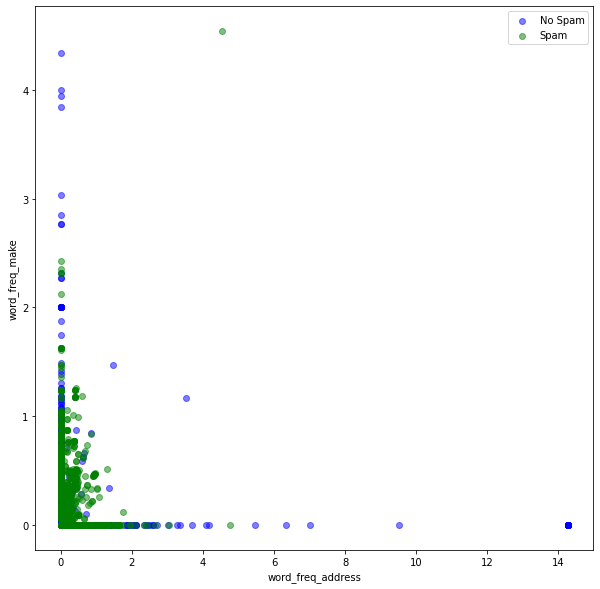

In [5]:
# Scikit-learn, see https://scikit-learn.org
import sklearn
import sklearn.svm

# Math operations
import numpy as np

# Drawing functions
import matplotlib.pyplot as plt

feature_y = 'word_freq_make'
feature_x = 'word_freq_address'

plt.figure(figsize=(10,10))
plt.scatter(df[df["y"] == 0][feature_x], df[df["y"] == 0][feature_y], alpha=0.5, c="blue", label="No Spam")
plt.scatter(df[df["y"] == 1][feature_x], df[df["y"] == 1][feature_y], alpha=0.5, c="green", label="Spam")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()

This is a much more real example than that given during the class, where data was generated. As you see here it is much harder or I would argue even impossible to draw a good line here between the two classes. Try out some of the other columns for seeing if you can find some that are a better fit. Feel free to google for features that could be indicative of being spam and try to visualize them in the plot above.

Luckily for us, we are not limited into drawing these kinds of line in only 2d like we did above. We can operate in N dimentions, where N is the number of features we have available using Support Vector Machines (SVMs). However, when we move away from 2d, into more dimentions, it becomes harder to visualize and understand, this is alwasy a tradeoff you have to keep in mind when working with Support Vector Machines. Lets keep it simple for now and stick with 2d for a little bit longer and follow the example that was shown during the live coding session in the recorded lecture and train the first linear SVM. Since our data is still together in one data frame, we also have to split it into the data (x) and labels (y).

In [6]:
# use i random samples
i = 50

sample = df.sample(i)

x = sample.iloc[:, :-1].values
y = sample.iloc[:, 57:].values

#specify the SVMs parameter
classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="rbf") #gamma=0.1 degree=3

# train the SVM
classifier.fit(x[:,:2], y.ravel())

SVC(C=10)

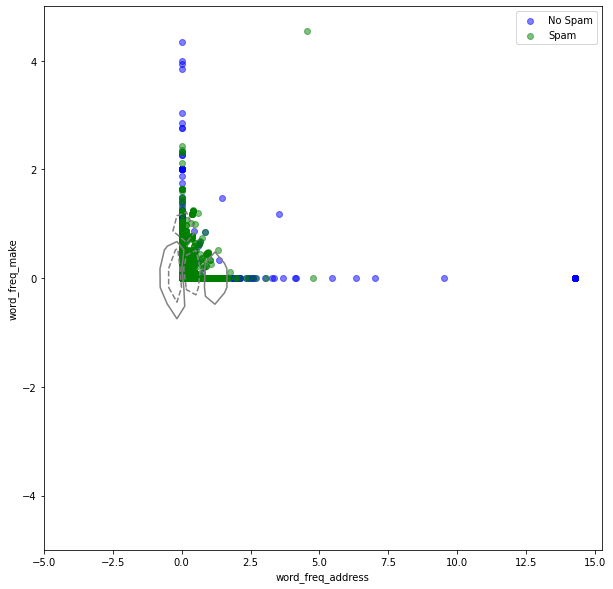

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

feature_y = 'word_freq_make'
feature_x = 'word_freq_address'

plt.scatter(df[df["y"] == 0][feature_x], df[df["y"] == 0][feature_y], alpha=0.5, c="blue", label="No Spam")
plt.scatter(df[df["y"] == 1][feature_x], df[df["y"] == 1][feature_y], alpha=0.5, c="green", label="Spam")
plt.xlabel(feature_x)
plt.ylabel(feature_y)

# calculate and plot decision boundary
xx = np.linspace(-5, 5, 30)
yy = np.linspace(-5, 5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='gray', levels=[-1, 0, 1],  linestyles=['--', '-', '--'])

#plt.savefig("example1.png", dpi=600, bbox_inches = 'tight', pad_inches=0)
plt.legend()
plt.show()

As you probably have seen is that this figure is a bit odd, and doesn't make a whole lot of sense. Even the classification algorithm can't do a good job with just two features. Lets follow the example from the lecture a bit more, but apply it to the complete data set we currently have, all 57 features. This does mean that we will now move into a 57-dimentional space. As such, visualizing is something we will skip where it doesn't make sense.

## Train and Test Split

In [8]:
import sklearn.model_selection

x = df.iloc[:, :-1].values
y = df.iloc[:, 57:].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y.ravel(), test_size=0.8, shuffle=True)

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# this might take a while, you can also limit the number of rows the classifier takes into account by using the "sample" method we used above

%time

classifier = sklearn.svm.SVC(C=10, gamma="scale", kernel="linear") #gamma=0.1 degree=3
classifier.fit(X_train, y_train)
classifier

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 64.4 µs


SVC(C=10, kernel='linear')

In [10]:
y_predict = classifier.predict(x)

In [11]:
wrong = x[(y_predict-y.ravel()) != 0]
print("Accuracy %.1f%%" %((1-len(wrong)/len(x)) * 100))

tmp = X_train[(classifier.predict(X_train)-y_train) != 0]
print("Accuracy Train %.1f%%" %((1-len(tmp)/len(X_train)) * 100))

tmp = X_test[(classifier.predict(X_test)-y_test) != 0]
print("Accuracy Test %.1f%%" %((1-len(tmp)/len(X_test)) * 100))

Accuracy 91.8%
Accuracy Train 94.3%
Accuracy Test 91.2%


Nice! We managed to get a decent accuraccy overall, and something a little less great on the data we didn't use to test. However, with a higher accuracy on the training data then on the test on the test data, we have created a classifier that is very good on our spam emails we used to train, but when new *unseen* emails (test data) the classifier is making mistakes. It may have been overfitted. Have a look at the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) documentation for the parameters that are available for the Support Vector Classifier and play around with them! 

<br/><br/> 

- Write down with what kind of settings you were able to achieve the best results below, but don't spend more than 30 minutes on this! *Tip: Try to work with different kernels*

- Write down in 300-500 words what different parameters you experimented with, and what effect they had on the accuracy and explain why you think this happened

##################
*Your answer goes here*
##################

Luckily we can apply dimensionality reduction to get rid of our 57 dimensions and reduce them to two, which we can visualize. One of the ways we can do this is by using prinicpal components analysis (PCA). Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

In [ ]:
from sklearn.decomposition import PCA


target_names = ['No Spam', 'Spam']
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [[0], [1]], target_names):
    plt.scatter(
        X_r[y[:,0] == i, 0], X_r[y[:,0] == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SPAM dataset")

plt.show()

As you can see, this is still not great for determining the difference visually, even though our classifier said it could be much better. Still as SVM (or SVCs in our case) have a hard time to be visualized, we could also stick with Decision Trees. What if we limit the depths of the Decision Tree and create a bunch of them, and let them all cast a vote for the classification of spam email?

## Random Forest Classifiers

On the [website of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), you can also find information about the different settings of a random forest classifier and several examples of how to implement them. It's up to you here to implement a random forst classifier and play around with the different parameters.


In [ ]:
## Provide your code for the random forest here

##################

*Provide a short description of the parameters you've set in your random forest, and what happens when you chance them in terms of accuracy and reason why these parameters affect the accuracy of your classifier.*

##################

One of the advantages of using random forests, is that we can also use them to determine feature importance. The idea behind this is that, if we have a tree, the feature that is most determining for being spam or no spam is higher up the tree. An example of this can be found [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html?highlight=random%20forest). Apply this example to the spam dataset and report the top 5 important features.

In [ ]:
## Provide your code for the determining the feature importance here

##################

*Report the top 5 important features*

##################

## Cross Validation

Up untill now we only created one set of training data, and one set of data to test on. Just by pure chance we could have been either very lucky or unlucky with this split and have a good or really bad split. We can counteract this by using cross validation. There are [different ways of cross validating your results](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), for this tutorial we will look at KFold. You can look at this by seperating your test and train data so that you have K number of slices. You will use each slice (slice k) exactly once to validate your results on, and all the others as training data for your model. You can find a bit more about the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) and an example [here](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py). **Apply it to the data set we used so far and report on the average accuracy over the different folds using 5 folds.**

In [ ]:
## Your code for cross validating goes here

##################

*Your average accuracy goes here*

##################